# Introdução 
Abaixo foi feita uma analise dos dados do COVID-19 obtidos no [site do BRASIL.IO](https://brasil.io/dataset/covid19/caso/), foram analisados numero de obitos e taxa de mortalidade.  

# Resumo  
Algumas observações interessantes foram feitas:

- O estado de São Paulo é oque tem maior numero de casos.
- O estado com maior taxa de mortalidade é o estado do Rio de Janeiro.
- A pandemia ainda esta longe de acabar, ainda estamos no meio dela.

# Leitura e processamento inicial dos dados

In [ ]:
# imports...
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
import matplotlib.colors as colors
from matplotlib import cm
import matplotlib as mpl
import seaborn as sns
import numpy as np
import pandas as pd
import random
import warnings

# personalizando opcoes gerais dos modulos
pd.options.display.float_format = lambda item: f'{item:,.2f}'
sns.set_style("whitegrid")
warnings.simplefilter(action='ignore', category=UserWarning)

Usando o [dataset do BRASIL.IO](https://brasil.io/dataset/covid19/caso/) sobre o COVID-19  

In [ ]:
url_covid = 'https://raw.githubusercontent.com/LucasGabrielB/Alura-Bootcamp-Data-Science-Aplicada/main/Modulo-01/datasets/caso.csv.gz'

df_covid = pd.read_csv(url_covid, na_values='Importados/Indefinidos')

# especificando tipo das colunas para otimizar o uso de memoria
df_covid = df_covid.astype({'place_type': 'category',
                 'state': 'category',
                 'death_rate': 'float32',
                 'city': 'category',
                 'city_ibge_code': 'float32',
                 'date': 'datetime64'})

In [ ]:
# cria um dataframe com a populacao estimada de cada estado
df_inhabitants_by_uf = df_covid.query('is_last == True').dropna().groupby('state')
df_inhabitants_by_uf = df_inhabitants_by_uf[['estimated_population', 'state']].sum()
df_inhabitants_by_uf

,estimated_population
state,
AC,"894,470.00"
AL,"3,351,543.00"
AM,"4,207,714.00"
AP,"861,773.00"
BA,"14,930,634.00"
CE,"9,187,103.00"
DF,"3,055,149.00"
ES,"4,064,052.00"
GO,"7,113,540.00"


# Análise dos dados 


Vamos começar fazendo uma análise dos dados que temos...  
Vamos ver o total de obitos por estado.

In [ ]:
# cria um dataframe com o total de mortes por covid na ultima data em que os dados foram atualizados
df_deaths_last_month = df_covid.query('is_last == True').dropna().groupby('state')['deaths'].sum()

# pega a ultima data em que os dados forao atualizados
last_date = df_covid.query('is_last == True')['date'].max().strftime('%d/%m/%Y')

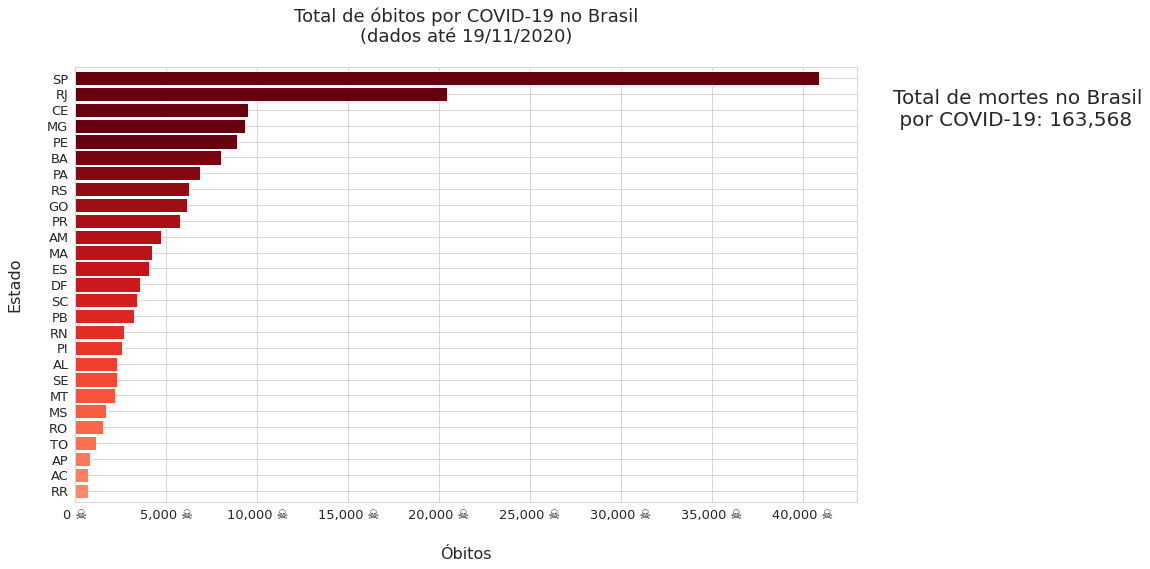

In [ ]:
fig, ax = plt.subplots()

# grafico com o total de mortes por covid-19 ate o momento 
color = cm.Reds(np.linspace(.4, 1.1, 27))
g1 = df_deaths_last_month.sort_values().plot(kind='barh',
                                             figsize=(14, 8),
                                             ax=ax,
                                             width=.9,
                                             color=color)

# personalizacao do grafico
g1.xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f} ☠️'))
plt.title(f'Total de óbitos por COVID-19 no Brasil\n(dados até {last_date})', pad=25, fontsize=18)
plt.xlabel('Óbitos', labelpad=25, fontsize=16)
plt.ylabel('Estado', labelpad=25, fontsize=16)
ax.tick_params(labelsize=13)
fig.patch.set_facecolor('#ffffff')

# adiciona o total de mortes
plt.text(45_000,
         23,
         f'Total de mortes no Brasil\n por COVID-19: {df_deaths_last_month.sum():,}',
         fontsize=20)

plt.show()

Claramente o estado de São Paulo é o que mais tem cassos, porem ele tambem é o estado mais populoso do Brasil, com aproximadamente 46,289,333 habitantes, e uma diferença muito grande do segundo colocado, Minas Gerais com 21,292,666 habitantes, então seria esperado que apenas observando o numero total de obitos o estado de São Paulo se destacase.  
  
Vamos fazer essa analise novamente porem agora levando em conta tambem o numero de habitantes. Taxa de mortalidade.  

> Taxa de mortalidade = Total de mortes / Número de habitantes * 100

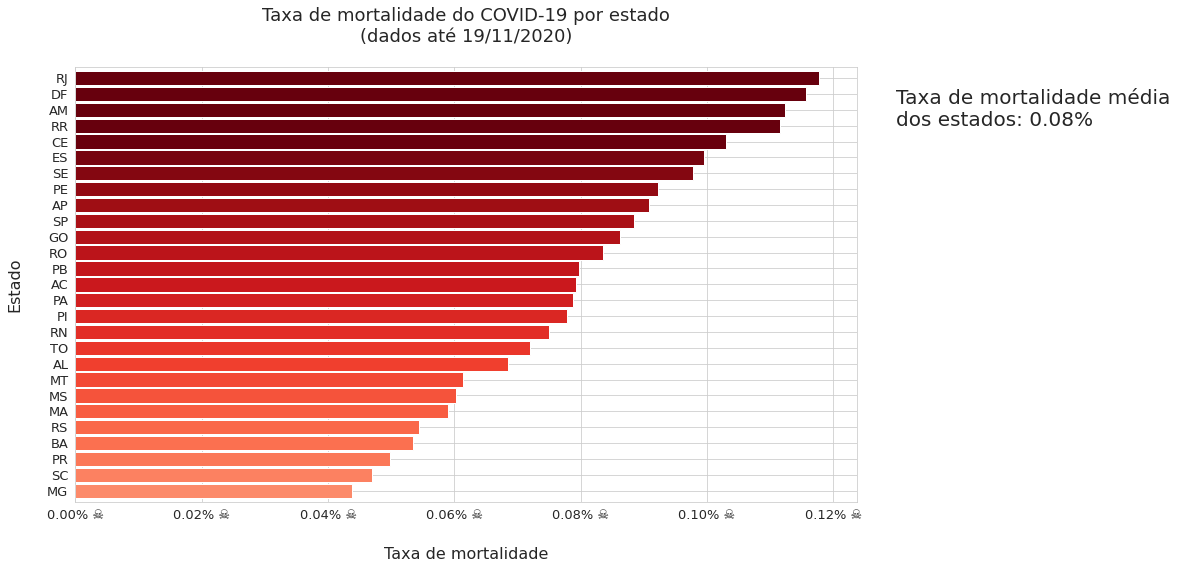

In [ ]:
fig, ax = plt.subplots()

# dataframe com a porcentagem da populacao de cada estado que veio a obito por COVID-19
df_deaths_by_inhabitants_uf = (pd.DataFrame(df_deaths_last_month)['deaths'].div(df_inhabitants_by_uf['estimated_population'], axis=0)) * 100

# grafico com a porcentagem da populacao de cada estado que veio a obito por COVID-19
color = cm.Reds(np.linspace(.4, 1.1, 27))
g2 = df_deaths_by_inhabitants_uf.sort_values().plot(kind='barh',
                                                    figsize=(14, 8),
                                                    ax=ax,
                                                    width=.9,
                                                    color=color)

# personalizacao do grafico
g2.xaxis.set_major_formatter(StrMethodFormatter('{x:.2f}% ☠️'))
plt.title(f'Taxa de mortalidade do COVID-19 por estado\n(dados até {last_date})', pad=25, fontsize=18)
plt.xlabel('Taxa de mortalidade', labelpad=25, fontsize=16)
plt.ylabel('Estado', labelpad=25, fontsize=16)
ax.tick_params(labelsize=13)
fig.patch.set_facecolor('#ffffff')

# adiciona o total de mortes
plt.text(0.13,
         23,
         f'Taxa de mortalidade média\ndos estados: {df_deaths_by_inhabitants_uf.mean():.2f}%',
         fontsize=20)

plt.show()

Analisando a taxa de mortalidade a situação muda bastante de figura, o estado que mais tinha óbitos era o estado de São Paulo, porem agora analisando os óbitos e relação ao número de habitantes do estado (taxa de mortalidade) o estado com maior número de óbitos é o Rio de Janeiro, com quase 0.12% de óbitos da população causados pelo COVID-19.  
O estado de São Paulo que antes liderava em total de obitos agora esta em 10° lugar.

Mas e o crescimento do numero de casos, como esta?  
Muito se escuta falando de uma segunda "onda" do COVID-19 mas nos sequer passamos da primeira?

In [ ]:
# criando dataframe com o numero de casos confirmados no brasil por dia
df_cases_per_day = df_covid.dropna()[['date', 'confirmed']].groupby('date').sum()
# adiciona a media movel de casos
df_cases_per_day['rolmean'] = df_cases_per_day.rolling(5).mean()

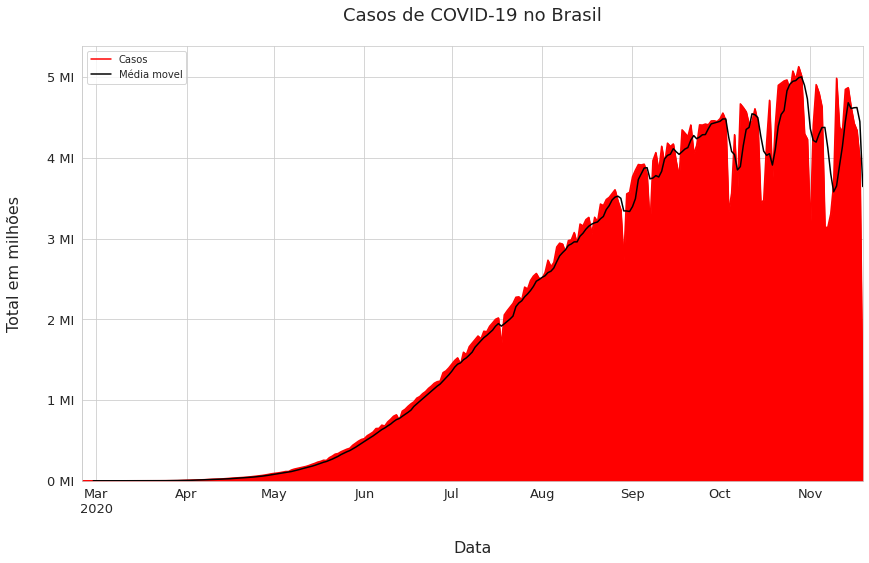

In [ ]:
fig, ax = plt.subplots()

# grafico com o numero de casos totais
g3 = (df_cases_per_day/1e6).plot(kind='area',
                           color='red',
                           figsize=(14, 8),
                           y='confirmed',
                           ax=ax)

# grafico com a media movel
g4 = (df_cases_per_day/1e6).plot(color='black',
                           figsize=(14, 8),
                           y='rolmean',
                           ax=ax)

# personalizacao do grafico
g3.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f} MI'))
plt.title('Casos de COVID-19 no Brasil', pad=25, fontsize=18)
plt.xlabel('Data', labelpad=25, fontsize=16)
plt.ylabel('Total em milhões', labelpad=25, fontsize=16)
ax.tick_params(labelsize=13)
fig.patch.set_facecolor('#ffffff')
ax.legend(['Casos', 'Média movel'])

plt.show()

Como podemos ver no grafico acima o numero de casos mesmo tendo se estabilizado um pouco recentemente continua crescente, oque pode indicar que talvez nem tenhamos ao menos passado da primeira "onda" do COVID-19.  